# Descrição dos Dados

Os dados foram coletados através de oito estações meteorológicas distribuídas na região da Burkina Faso, país africano localizado na África Subsaariana. Cerca de 70% da capacidade total de geração de energia da região é proveniente em grande parte de usinas termoelétricas, que operam sobre a queima de combustíveis fósseis, enquanto a energia hidrelétrica representa os 30% restantes.

Portanto, existe uma oportunidade de desenvolver e explorar o potencial da energia solar como alternativa de fonte renovável de energia para a região.

![Local2](images/cover.png)

### Arquivos

> - **Bobo_Dioulasso.xlsx**
> - **Boromo.xlsx**
> - **Bur_Dedougou.xlsx**
> - **Dori.xlsx**
> - **Fada_N'gourma.xlsx**
> - **Gaoua.xlsx**
> - **Ouahigouya.xlsx**
> - **Po.xlsx**

### Variáveis

#### Dependente 
$SR$: Radiação solar diária
#### Independentes
$T_{max}$: Temperatura máxima  
$T_{min}$: Temperatura mínima  
$WS$: Velocidade do vento  
$H_{max}$: Humidade do ar máxima  
$H_{min}$: Humidade do ar mínima  
$VPD$: Déficit de pressão de vapor (definido como a umidade máxima do ar quando saturado)  
$E_{o}$: Evaporação (mm/dia)

### Dimensão dos Dados

Período de gravação dos dados é de  **01/01/1998** até **31/12/2012** (15 anos).

**1998 - 2008 (11 anos)**: Treino  
**2008 - 2012 (4 anos)**: Teste 

In [1]:
# Importando as bibliotecas

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(rc={'figure.figsize':(11, 4)})
#%matplotlib

In [2]:
# Definindo o formato de data e hora

datetime.datetime.now().strftime("%Y-%m-%d")

'2019-10-23'

In [3]:
# Carregando os dados
#opsd_daily = pd.read_csv('dir', index_col=0, parse_dates=True)

rawdata = pd.read_excel('/home/lcs/Dropbox/Mestrado/ICD/Bobo_Dioulasso.xlsx', header=1)
#rawdata = pd.read_excel('/home/lcs/Dropbox/Mestrado/ICD/Boromo.xlsx', header=1)
#rawdata = pd.read_excel('/home/lcs/Dropbox/Mestrado/ICD/Bur_Dedougou.xlsx', header=1)
#rawdata = pd.read_excel('/home/lcs/Dropbox/Mestrado/ICD/Dori.xlsx', header=1)
#rawdata = pd.read_excel('/home/lcs/Dropbox/Mestrado/ICD/Fada_Ngourma.xlsx', header=1)
#rawdata = pd.read_excel('/home/lcs/Dropbox/Mestrado/ICD/Gaoua.xlsx', header=1)
#rawdata = pd.read_excel('/home/lcs/Dropbox/Mestrado/ICD/Ouahigouya.xlsx', header=1)
#rawdata = pd.read_excel('/home/lcs/Dropbox/Mestrado/ICD/Po.xlsx', header=1)

In [4]:
# Definindo o nome de cada variável

rawdata.columns = ['date','Wind Speed', 'T max', 'T min', 'Humidity max', 'Humidity min', 'VPD', 'Evaporation', 'Solar Radiation']

In [5]:
# Checando tamanho do dataframe

rawdata.shape

(5479, 9)

In [6]:
rawdata.head()

,date,Wind Speed,T max,T min,Humidity max,Humidity min,VPD,Evaporation,Solar Radiation
0,1998-01-01,1.2,32.7,22.0,35,19,2.862456,4.75,20.8
1,1998-01-02,2.6,29.0,21.6,43,28,2.177387,5.55,16.5
2,1998-01-03,1.7,33.8,20.4,35,16,2.988294,5.36,18.3
3,1998-01-04,2.1,34.0,22.2,43,22,2.837267,6.13,21.9
4,1998-01-05,1.7,34.4,22.4,26,13,3.368273,5.64,19.8


In [7]:
rawdata.tail()

,date,Wind Speed,T max,T min,Humidity max,Humidity min,VPD,Evaporation,Solar Radiation
5474,2012-12-27,1.8,29.4,18.4,43,22,2.201886,4.99,19.3
5475,2012-12-28,1.7,32.4,18.5,42,18,2.611593,5.37,21.4
5476,2012-12-29,1.8,31.5,17.0,39,16,2.532276,5.45,21.7
5477,2012-12-30,2.3,29.2,16.8,37,18,2.264097,5.80,21.9
5478,2012-12-31,2.3,30.0,15.1,38,15,2.335373,5.88,21.5


In [8]:
rawdata.dtypes

date               datetime64[ns]
Wind Speed                float64
T max                     float64
T min                     float64
Humidity max                int64
Humidity min                int64
VPD                       float64
Evaporation               float64
Solar Radiation           float64
dtype: object

In [9]:
rawdata.describe()

,Wind Speed,T max,T min,Humidity max,Humidity min,VPD,Evaporation,Solar Radiation
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,1.694963,33.659390,22.609619,67.974265,37.587698,2.156686,5.314935,20.729832
std,0.512284,3.286622,2.546314,29.890238,19.611784,1.114444,1.196685,3.751927
min,0.100000,22.000000,9.000000,6.000000,3.000000,0.168820,1.190000,2.000000
25%,1.300000,31.300000,21.000000,37.000000,17.000000,1.114053,4.590000,19.400000
50%,1.700000,33.800000,22.500000,77.000000,40.000000,2.073384,5.300000,21.300000
75%,2.000000,36.000000,24.000000,97.000000,55.000000,3.069629,6.130000,23.100000
max,4.800000,41.300000,32.100000,100.000000,90.000000,4.996336,10.340000,28.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bfe425f90>,
      dtype=object)

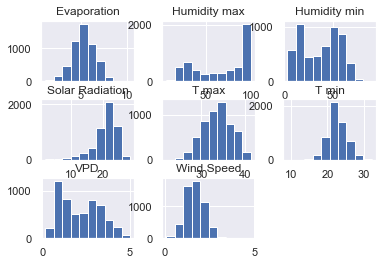

In [10]:
# Histograma das variáveis

rawdata.hist()

In [11]:
# Indexando o índice para time series

rawdata = rawdata.set_index('date')
rawdata.head()

,Wind Speed,T max,T min,Humidity max,Humidity min,VPD,Evaporation,Solar Radiation
date,,,,,,,,
1998-01-01,1.2,32.7,22.0,35,19,2.862456,4.75,20.8
1998-01-02,2.6,29.0,21.6,43,28,2.177387,5.55,16.5
1998-01-03,1.7,33.8,20.4,35,16,2.988294,5.36,18.3
1998-01-04,2.1,34.0,22.2,43,22,2.837267,6.13,21.9
1998-01-05,1.7,34.4,22.4,26,13,3.368273,5.64,19.8


In [12]:
# Adicionando colunas como ano, mês, dia da semana

rawdata['Year'] = rawdata.index.year
rawdata['Month'] = rawdata.index.month
rawdata['Weekday Name'] = rawdata.index.weekday_name

rawdata.sample(5)

,Wind Speed,T max,T min,Humidity max,Humidity min,VPD,Evaporation,Solar Radiation,Year,Month,Weekday Name
date,,,,,,,,,,,
2002-12-26,2.6,31.0,16.0,36,15,2.491203,6.34,21.0,2002,12,Thursday
2005-11-06,1.7,33.8,23.5,65,36,2.190018,4.90,17.1,2005,11,Sunday
2010-09-02,1.9,29.8,22.0,100,63,0.776007,4.15,18.8,2010,9,Thursday
2000-02-10,1.9,30.5,17.4,28,13,2.614794,6.08,24.9,2000,2,Thursday
2000-07-02,1.9,29.0,22.0,100,66,0.680965,4.33,20.9,2000,7,Sunday


In [13]:
# Fazendo busca de dados passando a data como chave

rawdata.loc['1999-09-28']
# rawdata.loc['2010-01-20':'2010-01-22']
# rawdata.loc['2006']
# rawdata.loc['2012-02']

Wind Speed              0.5
T max                  30.4
T min                  20.5
Humidity max            100
Humidity min             56
VPD                0.955106
Evaporation            3.96
Solar Radiation        19.9
Year                   1999
Month                     9
Weekday Name        Tuesday
Name: 1999-09-28 00:00:00, dtype: object

Text(0, 0.5, 'Solar Radiation')

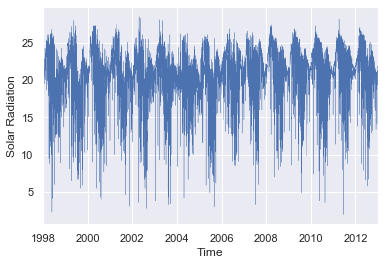

In [25]:
# Plot da radiação solar ao longo de todo o dataset

rawdata['Solar Radiation'].plot(linewidth=0.3)
plt.xlabel('Time')
plt.ylabel('Solar Radiation')

Text(0.5, 0, 'Time')

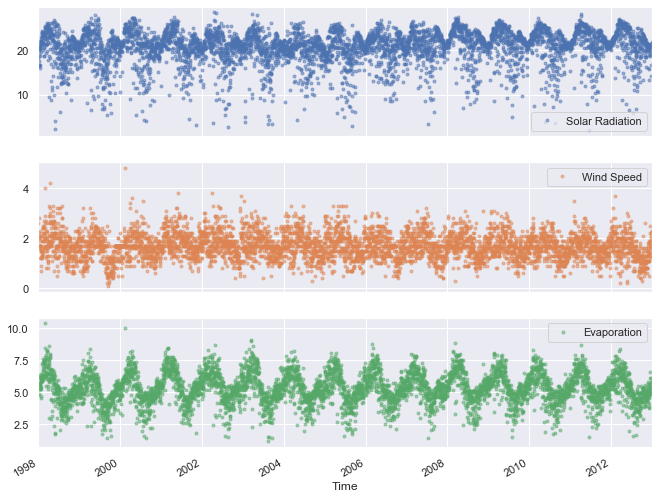

In [28]:
# Variação da SR, WS e Eo durante os 15 anos

cols_plot = ['Solar Radiation', 'Wind Speed', 'Evaporation']
axes = rawdata[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
plt.xlabel('Time')

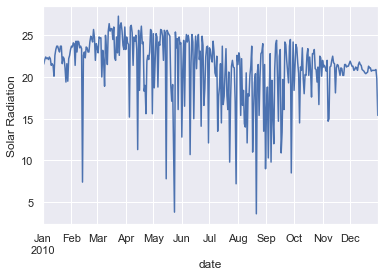

In [30]:
# Plot da SR apenas para o ano de 2010

ax = rawdata.loc['2010', 'Solar Radiation'].plot()
ax.set_ylabel('Solar Radiation');

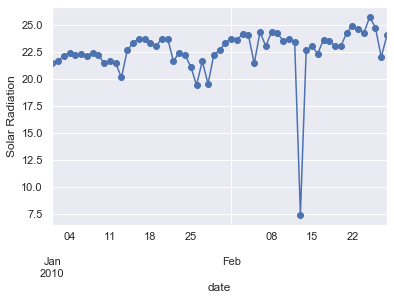

In [32]:
# Plot da SR para os meses de Janeiro e Fevereiro do ano de 2010

ax = rawdata.loc['2010-01':'2010-02', 'Solar Radiation'].plot(marker='o', linestyle='-')
ax.set_ylabel('Solar Radiation');

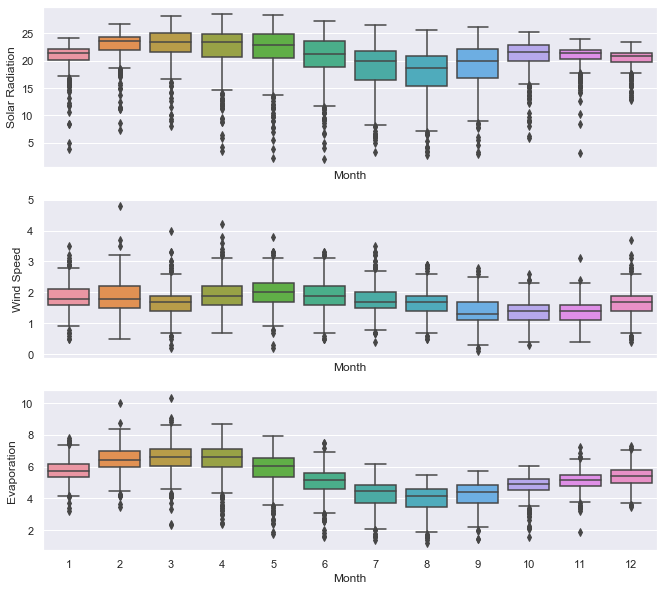

In [41]:
# Boxplot analisando os meses

fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Solar Radiation', 'Wind Speed', 'Evaporation'], axes):
    sns.boxplot(data=rawdata, x='Month', y=name, ax=ax)
    #ax.set_ylabel('SR')
    #ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
#if ax != axes[-1]:
#    ax.set_xlabel('')

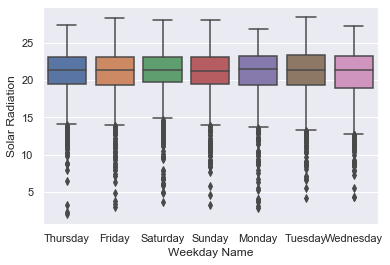

In [42]:
# Boxplot analisando os dias da semana

sns.boxplot(data=rawdata, x='Weekday Name', y='Solar Radiation');

In [43]:
# Resampling dos dados

data_columns = ['Solar Radiation', 'Wind Speed', 'Evaporation']
# Frequencia
week_m = rawdata[data_columns].resample('W').mean()
week_m.head(10)

,Solar Radiation,Wind Speed,Evaporation
date,,,
1998-01-04,19.375000,1.900000,5.447500
1998-01-11,18.285714,1.900000,5.492857
1998-01-18,18.942857,1.828571,5.580000
1998-01-25,21.214286,1.814286,5.914286
1998-02-01,21.857143,1.214286,5.421429
1998-02-08,23.285714,1.414286,6.182857
1998-02-15,22.142857,2.028571,6.668571
1998-02-22,23.200000,2.128571,7.028571
1998-03-01,21.600000,2.271429,7.172857


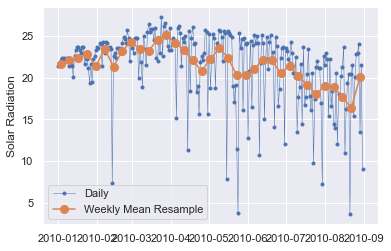

In [44]:
# Plot das duas times series (normal e resample)

# Start and end of the date range to extract
start, end = '2010-01', '2010-08'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(rawdata.loc[start:end, 'Solar Radiation'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(week_m.loc[start:end, 'Solar Radiation'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Radiation')
ax.legend();